Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Loading the dataset

In [6]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

Print the first 5 rows of the dataframe.

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Load the statistics of the dataset

In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Information of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Check if there is Duplicated in the dataset

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

Drop Duplication

In [11]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Plot all columns

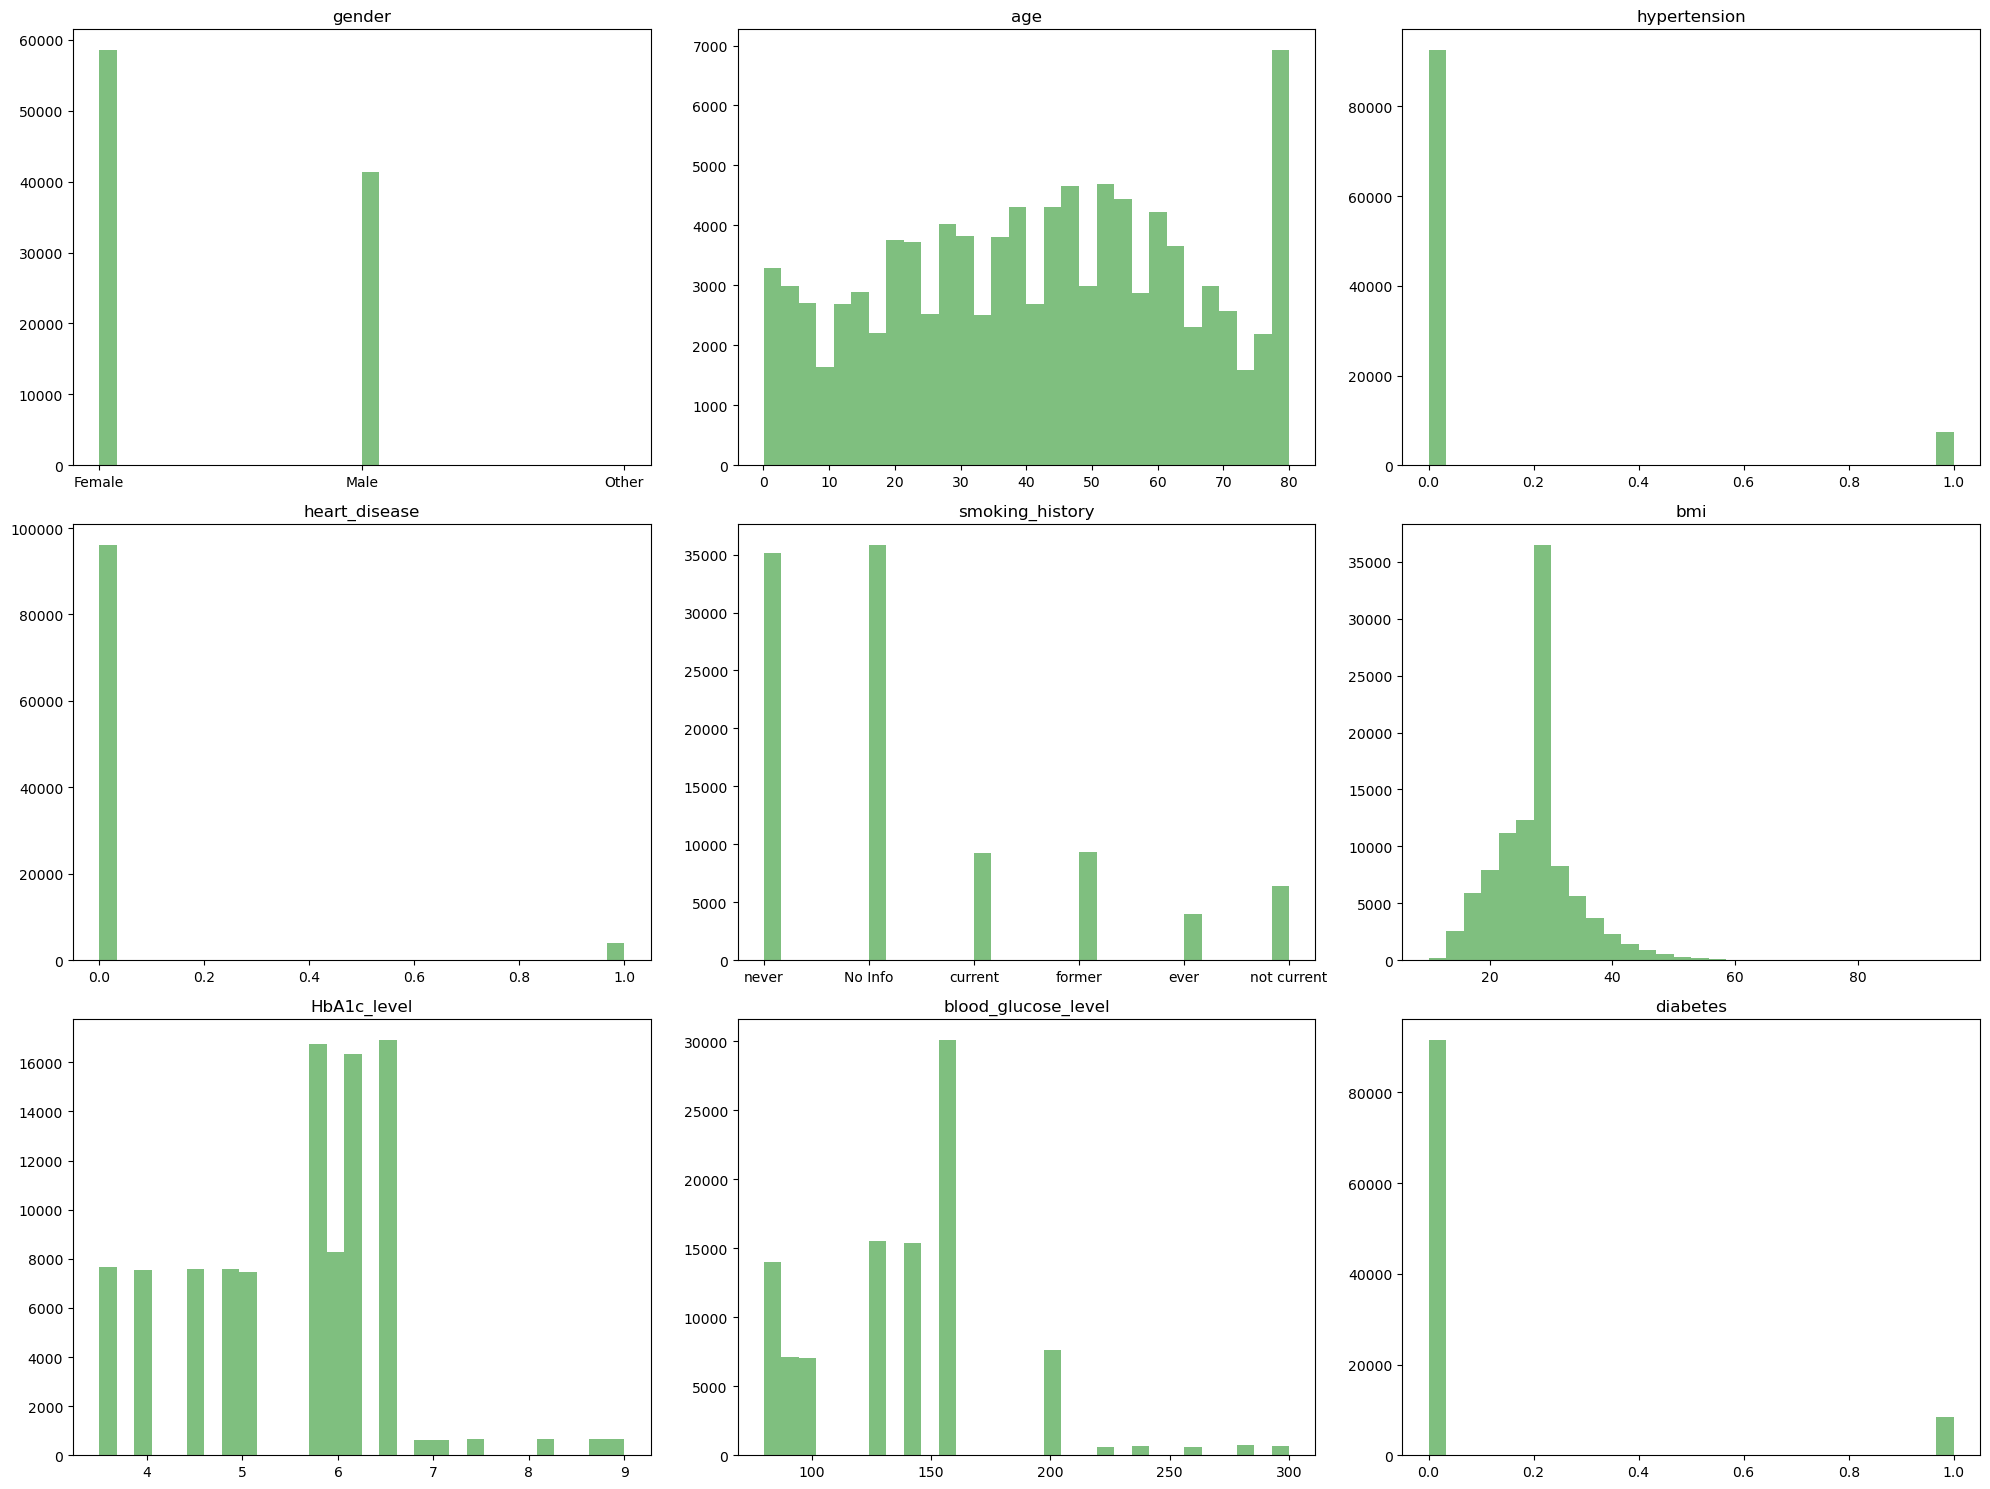

In [8]:
rows = 3
col = 3
fig, axs = plt.subplots(rows, col, figsize=(20, 15))
axs = axs.ravel()
for i in range(rows * col):
    axs[i].hist(df.iloc[:, i], bins=30, color='g', alpha=0.5)
    axs[i].set_title(df.columns[i])
plt.tight_layout()
plt.show()

Check if there is null values

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Visualizing Missing Values

<Axes: >

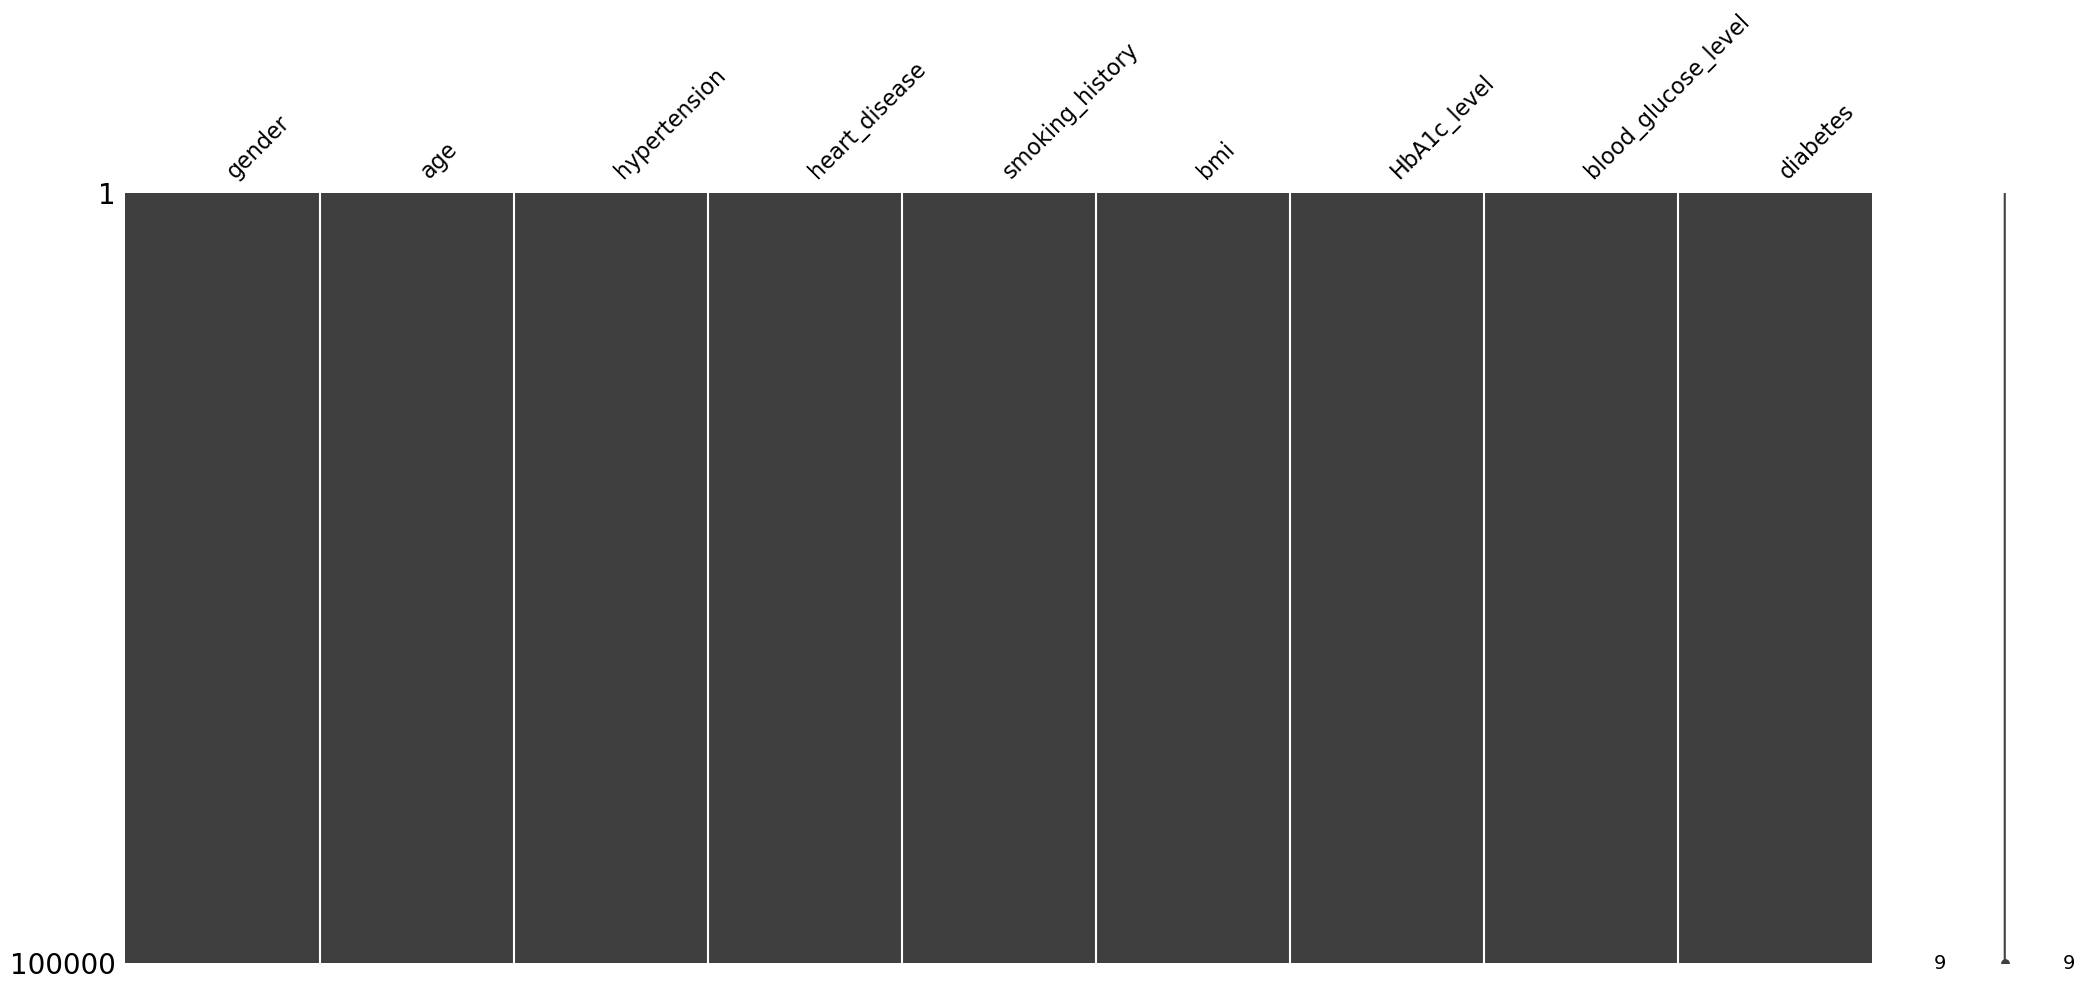

In [12]:
import missingno as msno
msno.matrix(df)

Observing the shape of the data

In [11]:
df.shape

(100000, 9)

Knowing the data type of each column

In [12]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Plotting the data type analysis before preprossing

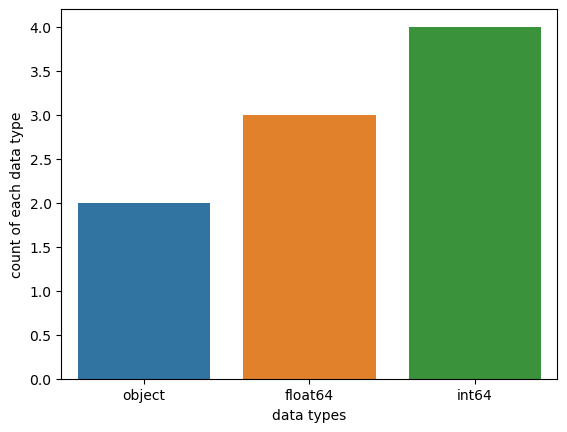

In [13]:
sns.countplot(x=df.dtypes ,data=df)
plt.ylabel("count of each data type")
plt.xlabel("data types")
plt.show()

Define the value that exsits in Smoking column "Object"

In [14]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

Define the value that exsits in Gender column "Object"

In [15]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

Colunms Name in the dataset

In [16]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Convert the values in Gender and Smoking columns into integer by using LabelEncoder

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lb = LabelEncoder()
df["gender"] = lb.fit_transform(df["gender"] )
df["smoking_history"] = lb.fit_transform(df["smoking_history"] )

Define the value that exsits in Smoking column "Integers"

In [18]:
df["smoking_history"].unique()

array([4, 0, 1, 3, 2, 5])

Define the value that exsits in Gender column "Integers"

In [19]:
df["gender"].unique()

array([0, 1, 2])

In [20]:
df.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Plotting the data type analysis after preprossing

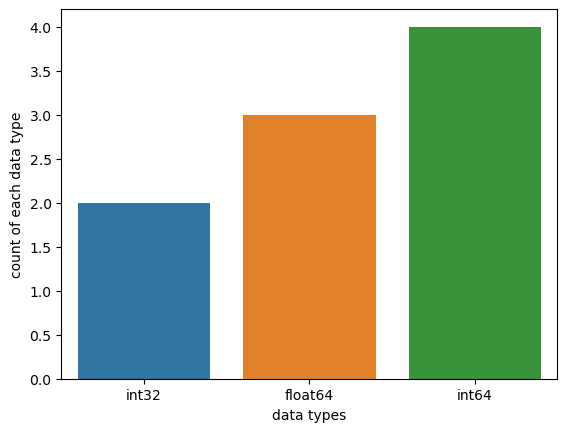

In [21]:
sns.countplot(x=df.dtypes ,data=df)
plt.ylabel("count of each data type")
plt.xlabel("data types")
plt.show()

Plotting the target Variable

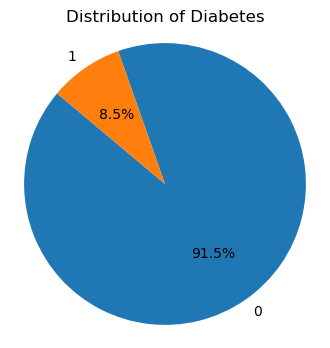

In [22]:
diabetes_counts = df['diabetes'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes')
plt.axis('equal')

plt.show()

Scatterplot Age vs BM

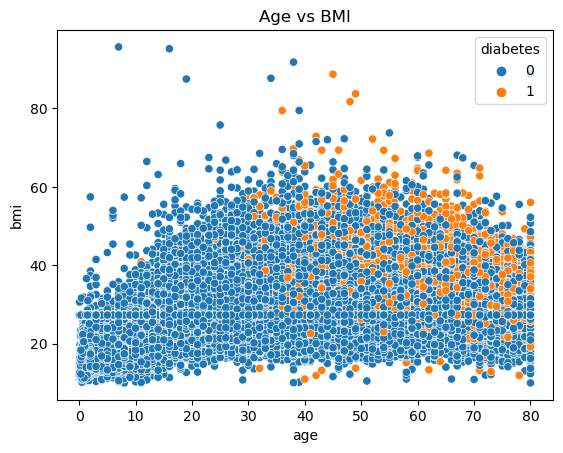

In [23]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

Scatter 

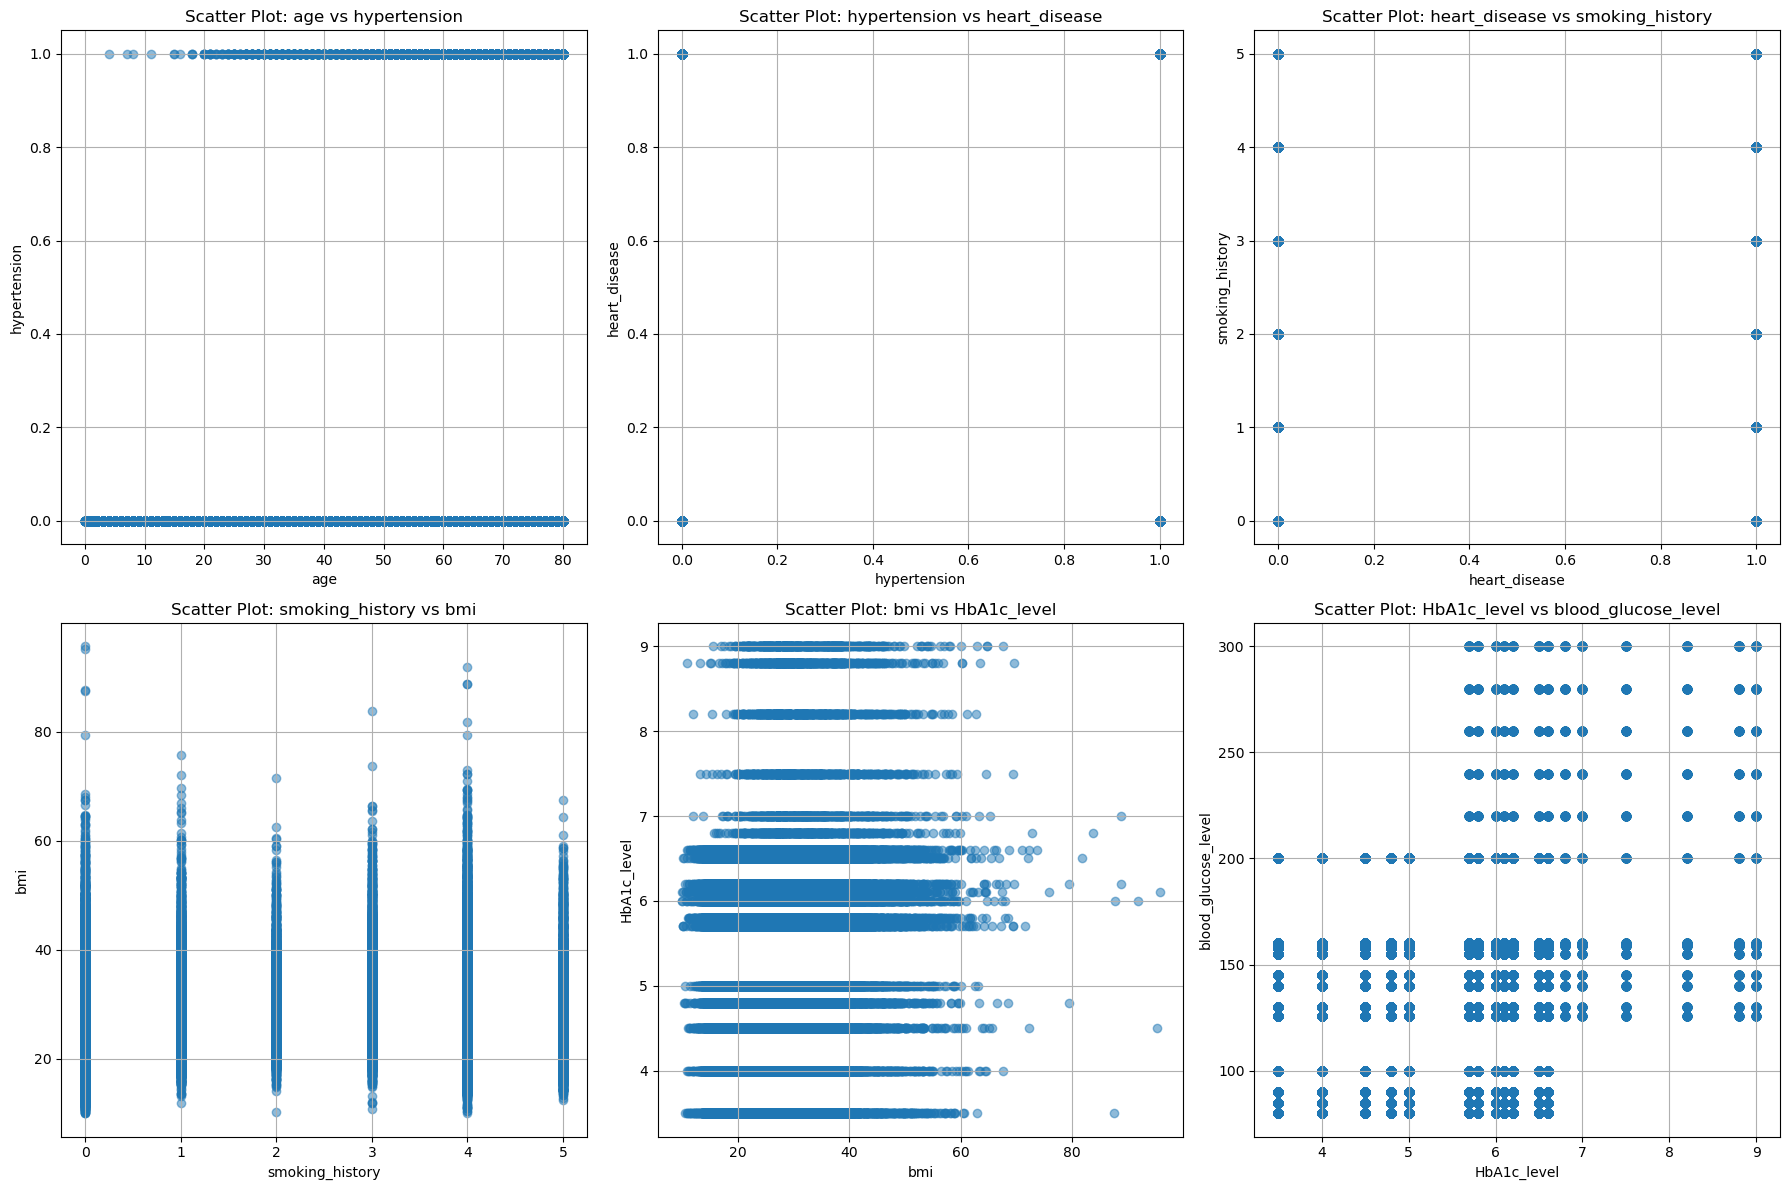

In [24]:
variables = ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

k = 0
for i in range(2):
    for j in range(3):
        if k < len(variables)-1:
            axs[i, j].scatter(df[variables[k]], df[variables[k+1]], alpha=0.5)
            axs[i, j].set_title(f'Scatter Plot: {variables[k]} vs {variables[k+1]}')
            axs[i, j].set_xlabel(variables[k])
            axs[i, j].set_ylabel(variables[k+1])
            axs[i, j].grid(True)
            k += 1

plt.tight_layout()
plt.show()


The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

Pair plot for clean data

In [ ]:
%matplotlib inline
sns.pairplot(data=df, diag_kind='kde', hue='diabetes')
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Make the range of data between [-1,1] "Normalization" by using "StandardScaler"

In [16]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["diabetes"],axis = 1),),
        columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level'])

In [26]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841047,1.692704,-0.284439,4.936379,0.963327,-0.321056,1.001706,0.047704
1,-0.841047,0.538006,-0.284439,-0.202578,-1.153468,-0.000116,1.001706,-1.426210
2,1.187234,-0.616691,-0.284439,-0.202578,0.963327,-0.000116,0.161108,0.489878
3,-0.841047,-0.261399,-0.284439,-0.202578,-0.624269,-0.583232,-0.492690,0.416183
4,1.187234,1.515058,3.515687,4.936379,-0.624269,-1.081970,-0.679490,0.416183


Assign the target column to y 

In [14]:
y = df.diabetes

Feature Selection "We do not need it in our project"

In [18]:
# Perform feature selection
#selector = SelectKBest(score_func=f_classif, k=8)  # Select top 5 features 
#X_selected = selector.fit_transform(X, y)

# Get selected feature indices
#selected_indices = selector.get_support(indices=True)

# Print selected feature names
#selected_feature_names = X.columns[selected_indices]
#print("Selected Features:")
#print(selected_feature_names)

Splitting the data

In [17]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.33)

# Applying LogisticRegression Model

In [21]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='sag',C=2,random_state=33,max_iter=100)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=33, solver='sag')

Calculate train and test score

In [22]:
print('LogisticRegressionModel Train Score is: ' , log_reg.score(X_train, y_train))
print('LogisticRegressionModel Test Score is: ' , log_reg.score(X_test, y_test))
print('LogisticRegressionModel Classes are: ' , log_reg.classes_)
print('LogisticRegressionModel No. of iteratios is: ' , log_reg.n_iter_)

LogisticRegressionModel Train Score is:  0.9599701492537314
LogisticRegressionModel Test Score is:  0.961
LogisticRegressionModel Classes are:  [0 1]
LogisticRegressionModel No. of iteratios is:  [20]


Calculate Prediction

In [23]:
y_pred = log_reg.predict(X_test)
y_pred_log = y_pred
accuracy_log = accuracy_score(y_test, y_pred)
precision_log, recall_log, f1_scor_log, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
y_pred_prob = log_reg.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is: ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is: \n' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is:  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for LogisticRegressionModel is: 
 [[9.97322235e-01 2.67776514e-03]
 [9.98859052e-01 1.14094762e-03]
 [9.92946441e-01 7.05355929e-03]
 [9.71909613e-01 2.80903870e-02]
 [9.98997616e-01 1.00238437e-03]
 [8.04497556e-01 1.95502444e-01]
 [9.99061518e-01 9.38482039e-04]
 [9.63348394e-01 3.66516055e-02]
 [9.76223712e-01 2.37762880e-02]
 [9.99536617e-01 4.63383184e-04]]


Calculating confusion_matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29805   302]
 [ 1065  1828]]


Classification report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30107
           1       0.86      0.63      0.73      2893

    accuracy                           0.96     33000
   macro avg       0.91      0.81      0.85     33000
weighted avg       0.96      0.96      0.96     33000



Data visualization of the confusion matrix

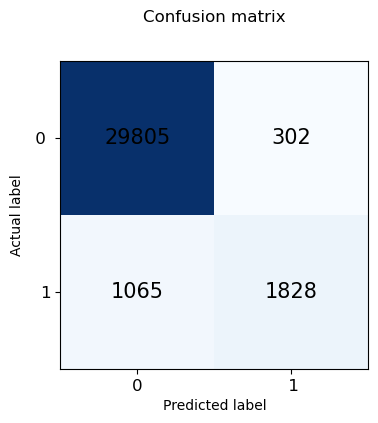

In [35]:
from sklearn import metrics
y_pred = log_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1367


# Applying KNN Model

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

Calculate train and test score

In [38]:
print('KNN Train Score is: ' , knn_classifier.score(X_train, y_train))
print('KNN Test Score is: ' , knn_classifier.score(X_test, y_test))
print('KNN Classes are: ' , knn_classifier.classes_)

KNN Train Score is:  0.9639253731343284
KNN Test Score is:  0.9609090909090909
KNN Classes are:  [0 1]


Calculate Predictions

In [26]:
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='macro')
y_pred_prob = knn_classifier.predict_proba(X_test)
print('Predicted Value for KNN Model is: ' , y_pred_knn[:10])
print('Prediction Probabilities Value for KNN Model is: \n' , y_pred_prob[:10])

Predicted Value for KNN Model is:  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for KNN Model is: 
 [[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


Calculate confusion_matrix

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30048    59]
 [ 1231  1662]]


Classification report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30107
           1       0.97      0.57      0.72      2893

    accuracy                           0.96     33000
   macro avg       0.96      0.79      0.85     33000
weighted avg       0.96      0.96      0.96     33000



Data visualization of the confusion matrix

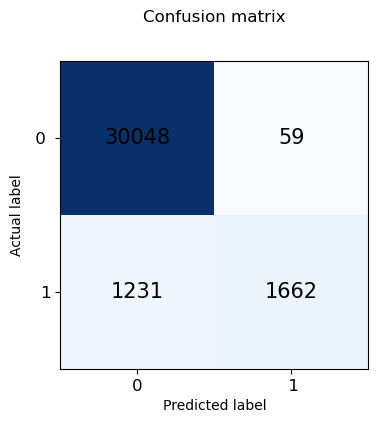

In [42]:
y_pred = knn_classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1290


# Applying Decision Tree Model

In [27]:
tree_classifier = DecisionTreeClassifier(criterion='entropy',  random_state=44)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=44)

Calculate Train and Test score

In [45]:
print('Decision Tree Train Score is: ' , tree_classifier.score(X_train, y_train))
print('Decision Tree Test Score is: ' , tree_classifier.score(X_test, y_test))
print('Decision Tree Classes are: ' , tree_classifier.classes_)

Decision Tree Train Score is:  0.9992835820895523
Decision Tree Test Score is:  0.953
Decision Tree Classes are:  [0 1]


Calculate Predictions

In [28]:
y_pred = tree_classifier.predict(X_test)
y_pred_tree = y_pred
accuracy_tree = accuracy_score(y_test, y_pred_knn)
precision_tree, recall_tree, f1_scor_tree, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

y_pred_prob = tree_classifier.predict_proba(X_test)
print('Predicted Value for Decision Tree Model is: ' , y_pred[:10])
print('Prediction Probabilities Value for Decision Tree Model is: \n' , y_pred_prob[:10])

Predicted Value for Decision Tree Model is:  [0 0 0 0 0 1 0 0 0 0]
Prediction Probabilities Value for Decision Tree Model is: 
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Calc confusion_matrix

In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29327   780]
 [  771  2122]]


Classification report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30107
           1       0.73      0.73      0.73      2893

    accuracy                           0.95     33000
   macro avg       0.85      0.85      0.85     33000
weighted avg       0.95      0.95      0.95     33000



Data visualization of the confusion matrix

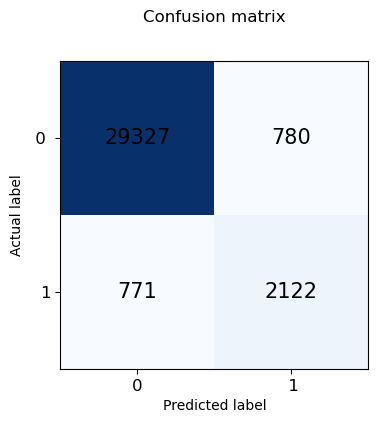

In [49]:
y_pred = tree_classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1551


# Applying Support Vector Machine

In [29]:
from sklearn.svm import SVC
svcmodel=SVC(kernel='linear',C=1,tol=0.001,gamma='auto',probability=True) #max_itre
svcmodel.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

Calc Train and Test Score

In [56]:
print('SVC Train Score is: ' , svcmodel.score(X_train, y_train))
print('SVC Test Score is: ' , svcmodel.score(X_test, y_test))
print('SVC Classes are: ' , svcmodel.classes_)

SVC Train Score is:  0.9615671641791045
SVC Test Score is:  0.9593333333333334
SVC Classes are:  [0 1]


Model Predictions

In [30]:
y_pred=svcmodel.predict(X_test)
y_pred_svc=y_pred
accuracy_svc = accuracy_score(y_test, y_pred_knn)
precision_svc, recall_svc, f1_scor_svc, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

y_prob = svcmodel.predict_proba(X_test)
print('The predicted value for SVC model is : ',y_pred[:5])
print('The probabilites of The prediction value for SVC model is \n : ',y_prob[:5])

The predicted value for SVC model is :  [0 0 0 0 0]
The probabilites of The prediction value for SVC model is 
 :  [[9.97636880e-01 2.36311970e-03]
 [9.98908561e-01 1.09143941e-03]
 [9.82002604e-01 1.79973961e-02]
 [9.65744461e-01 3.42555388e-02]
 [9.99055561e-01 9.44439380e-04]]


Calc Confusion Matrix

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29946   161]
 [ 1181  1712]]


Classification Report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     30107
           1       0.91      0.59      0.72      2893

    accuracy                           0.96     33000
   macro avg       0.94      0.79      0.85     33000
weighted avg       0.96      0.96      0.96     33000



Data visualization of the confusion matrix

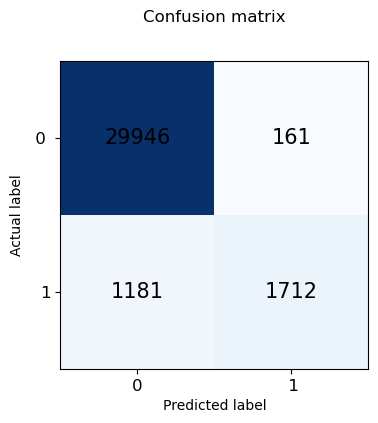

In [60]:
from sklearn import metrics
y_pred = svcmodel.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1342


# Applying Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=20,criterion='entropy',max_depth=50)
random_forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=20)

Calc Train and Test Score

In [63]:
print('Random Forest Train Score is: ' , random_forest.score(X_train, y_train))
print('Random Forest Test Score is: ' , random_forest.score(X_test, y_test))
print('Random Forest Classes are: ' , random_forest.classes_)

Random Forest Train Score is:  0.9973731343283582
Random Forest Test Score is:  0.9694848484848485
Random Forest Classes are:  [0 1]


Model Predictions

In [32]:
y_pred=random_forest.predict(X_test)
y_pred_ran=y_pred
accuracy_ran = accuracy_score(y_test, y_pred_knn)
precision_ran, recall_ran, f1_scor__ran, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

y_prob = random_forest.predict_proba(X_test)
print('The predicted value for Random Forest model is : ',y_pred[:5])
print('The probabilites of The prediction value for Random Forest model is \n : ',y_prob[:5])

The predicted value for Random Forest model is :  [0 0 0 0 0]
The probabilites of The prediction value for Random Forest model is 
 :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Calc confusion_matrix

In [65]:
bm = confusion_matrix(y_test, y_pred)
print(bm)

[[30000   107]
 [  900  1993]]


Classification Report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30107
           1       0.95      0.69      0.80      2893

    accuracy                           0.97     33000
   macro avg       0.96      0.84      0.89     33000
weighted avg       0.97      0.97      0.97     33000



Data visualization of the confusion matrix

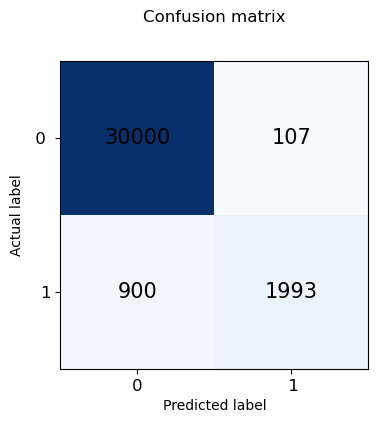

In [67]:
from sklearn import metrics
y_pred = random_forest.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1007


# Applying Naive Bayes Model

In [33]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, y_train)

GaussianNB()

Calculate Train and Test Score

In [70]:
print('Naive Bayes Model Train Score is: ' , naive_classifier.score(X_train, y_train))
print('Naive Bayes Model Test Score is: ' , naive_classifier.score(X_test, y_test))
print('Naive Bayes Model Classes are: ' , naive_classifier.classes_)

Naive Bayes Model Train Score is:  0.903910447761194
Naive Bayes Model Test Score is:  0.9013030303030303
Naive Bayes Model Classes are:  [0 1]


Calculate Predictions

In [34]:
y_pred = naive_classifier.predict(X_test)
y_pred_nai = y_pred
accuracy_nai = accuracy_score(y_test, y_pred_knn)
precisio_nai, recall_nai, f1_sco_nai, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

y_pred_prob = naive_classifier.predict_proba(X_test)
print('Predicted Value for Naive Bayes Model is: ' , y_pred[:10])
print('Prediction Probabilities Value for Naive Bayes Model is: \n' , y_pred_prob[:10])

Predicted Value for Naive Bayes Model is:  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for Naive Bayes Model is: 
 [[9.94777451e-01 5.22254918e-03]
 [9.99174855e-01 8.25144670e-04]
 [9.99972354e-01 2.76463065e-05]
 [9.97419641e-01 2.58035897e-03]
 [9.99014208e-01 9.85791815e-04]
 [9.56858324e-01 4.31416757e-02]
 [9.98844156e-01 1.15584416e-03]
 [9.96230549e-01 3.76945150e-03]
 [9.97408780e-01 2.59121982e-03]
 [9.99976548e-01 2.34523451e-05]]


Calculate confusion_matrix

In [72]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27878  2229]
 [ 1028  1865]]


Classification Report

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     30107
           1       0.46      0.64      0.53      2893

    accuracy                           0.90     33000
   macro avg       0.71      0.79      0.74     33000
weighted avg       0.92      0.90      0.91     33000



Data visualization of the confusion matrix

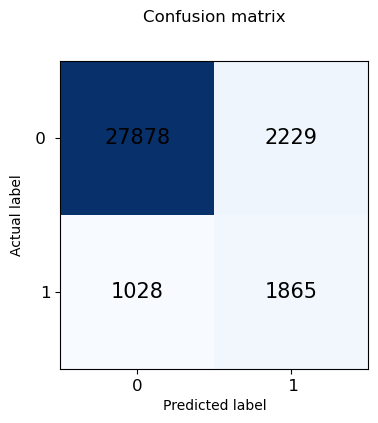

In [74]:
y_pred = naive_classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', ZeroOneLossValue)

Zero One Loss Value:  3257


Results of All Models

In [76]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

In [46]:
'''
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='macro')

y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_knn)
precision_log, recall_log, f1_scor_log, _ = precision_recall_fscore_support(y_test, y_pred_log, average='macro')

y_pred_tree = tree_classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_knn)
precision_tree, recall_tree, f1_scor_tree, _ = precision_recall_fscore_support(y_test, y_pred_tree, average='macro')

y_pred_nai = naive_classifier.predict(X_test)
accuracy_nai = accuracy_score(y_test, y_pred_knn)
precisio_nai, recall_nai, f1_sco_nai, _ = precision_recall_fscore_support(y_test, y_pred_nai, average='macro')

y_pred_ran=random_forest.predict(X_test)
accuracy_ran = accuracy_score(y_test, y_pred_knn)
precision_ran, recall_ran, f1_scor__ran, _ = precision_recall_fscore_support(y_test, y_pred_ran, average='macro')

y_pred_svc=svcmodel.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_knn)
precision_svc, recall_svc, f1_scor_svc, _ = precision_recall_fscore_support(y_test, y_pred_svc, average='macro')
'''
model_dict = {
    "KNN":[accuracy_knn,precision_knn,recall_knn,f1_score_knn],
    "LogisticRegression": [accuracy_log,precision_log, recall_log, f1_scor_log],
    "Naive Bayes": [accuracy_nai,precisio_nai, recall_nai, f1_sco_nai],
    "DecisionTreeClassifier": [accuracy_tree,precision_tree, recall_tree, f1_scor_tree],
    "SVC": [accuracy_svc,precision_svc, recall_svc, f1_scor_svc],
    "Random Forest": [accuracy_ran,precision_ran, recall_ran, f1_scor__ran]
}
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy','precision','recall','f1_score'])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy','precision','recall','f1_score'] = model_dict.values()
print("Models Accuracies in Descending Order: ")
print(model_accuracies_df.sort_values(by = "Accuracy", ascending=False, ignore_index=True))

Models Accuracies in Descending Order: 
                    Model Accuracy precision recall f1_score  \
0                     KNN      NaN       NaN    NaN      NaN   
1      LogisticRegression      NaN       NaN    NaN      NaN   
2             Naive Bayes      NaN       NaN    NaN      NaN   
3  DecisionTreeClassifier      NaN       NaN    NaN      NaN   
4                     SVC      NaN       NaN    NaN      NaN   
5           Random Forest      NaN       NaN    NaN      NaN   

             (Accuracy, precision, recall, f1_score)  
0  [0.9633030303030303, 0.96978309239648, 0.78885...  
1  [0.9633030303030303, 0.9157329215724128, 0.814...  
2  [0.9633030303030303, 0.7091938502587217, 0.794...  
3  [0.9633030303030303, 0.8428320520185857, 0.860...  
4  [0.9633030303030303, 0.9429993994845877, 0.797...  
5  [0.9633030303030303, 0.9600665592436219, 0.842...  


# K-Means Cluster

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

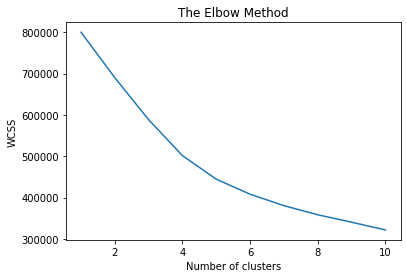

In [42]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# # Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [44]:
print(y_kmeans)

[0 3 1 ... 1 3 3]


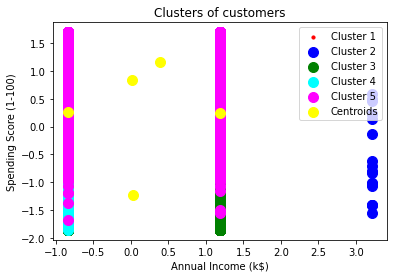

In [25]:
import numpy as np

# Convert DataFrame X to a NumPy array
X_array = X.to_numpy()

# Visualising the clusters
plt.scatter(X_array[y_kmeans == 0, 0], X_array[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_array[y_kmeans == 1, 0], X_array[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_array[y_kmeans == 2, 0], X_array[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_array[y_kmeans == 3, 0], X_array[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_array[y_kmeans == 4, 0], X_array[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1342, 100000) and data type float64